In [3]:
%pylab inline
import pandas as pd
import seaborn as sns
import jPlateAnalyzer as jPA

Populating the interactive namespace from numpy and matplotlib


In [4]:
J=jPA.jPA_expt()

In [5]:
J.import_tecanF200('2014_04_26_atc_grad_nolimo.xlsx','Sheet2')

Read 2 time course(s)
abs600
rfp


In [6]:
J.abs600=J.abs600.applymap(jPA.utils.od_transform_plastic_cover)

In [7]:
J.add_well_info_from_xls('2014_04_26_atc_grad_nolimo.xlsx','Sheet1')

read field strain
read field atc


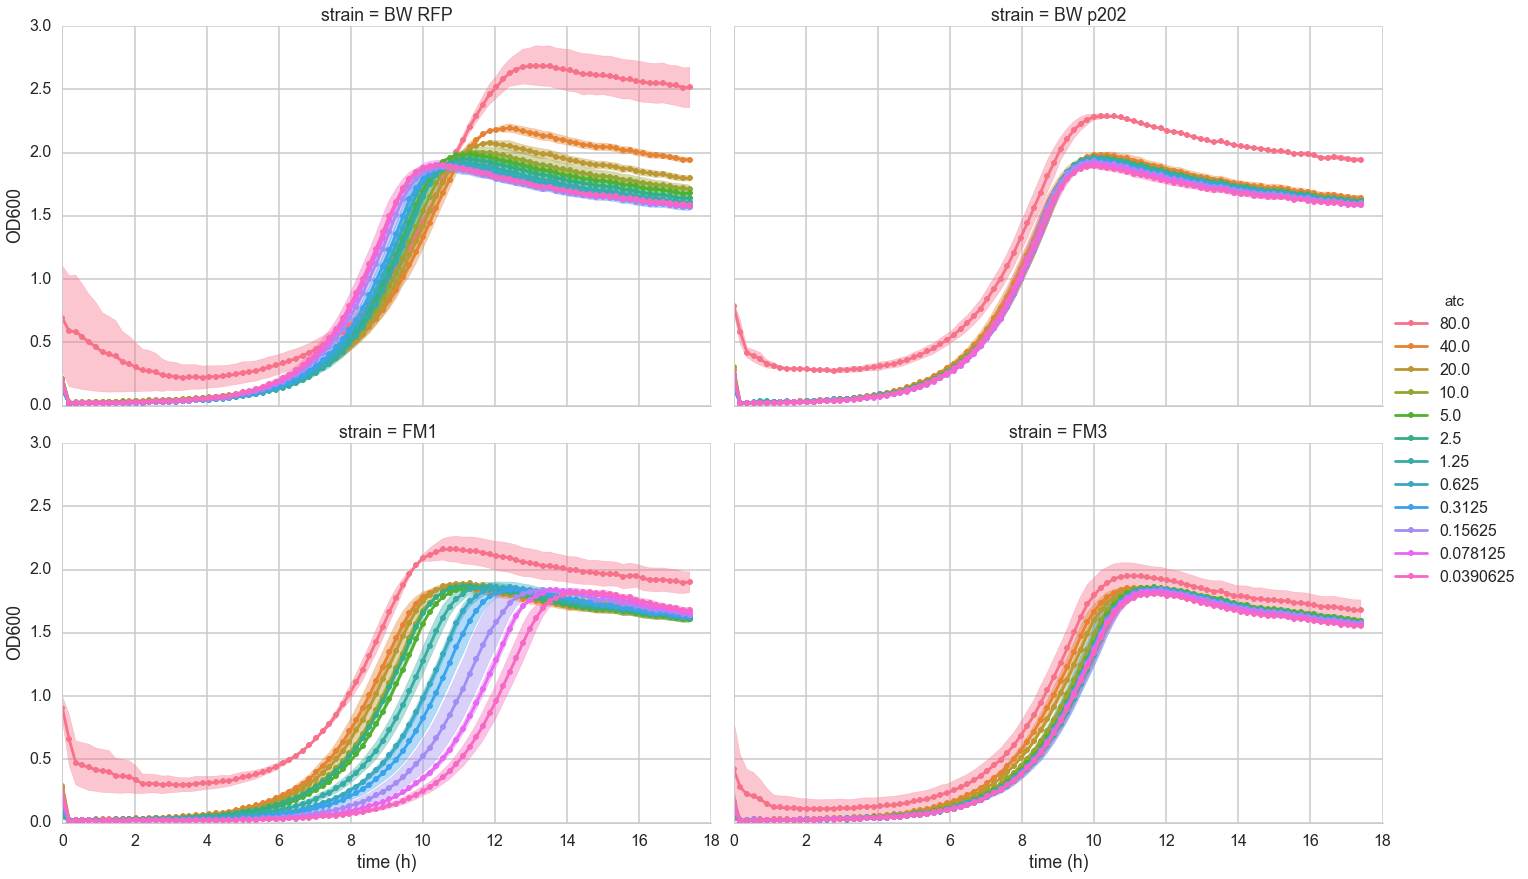

In [8]:
with sns.plotting_context('poster'):
    with sns.axes_style('whitegrid'):
        J.group_plot(J.abs600,col='strain',hue='atc',col_wrap=2,size=6,aspect=1.6,shade_reps=True,ylabel='OD600')


>something screwy is happening with the 80nM aTc curve. Let's just exclude that one from the plot
>
>we can do this by filtering the `well_info` dataframe and passing it explicitly to `group_plot`

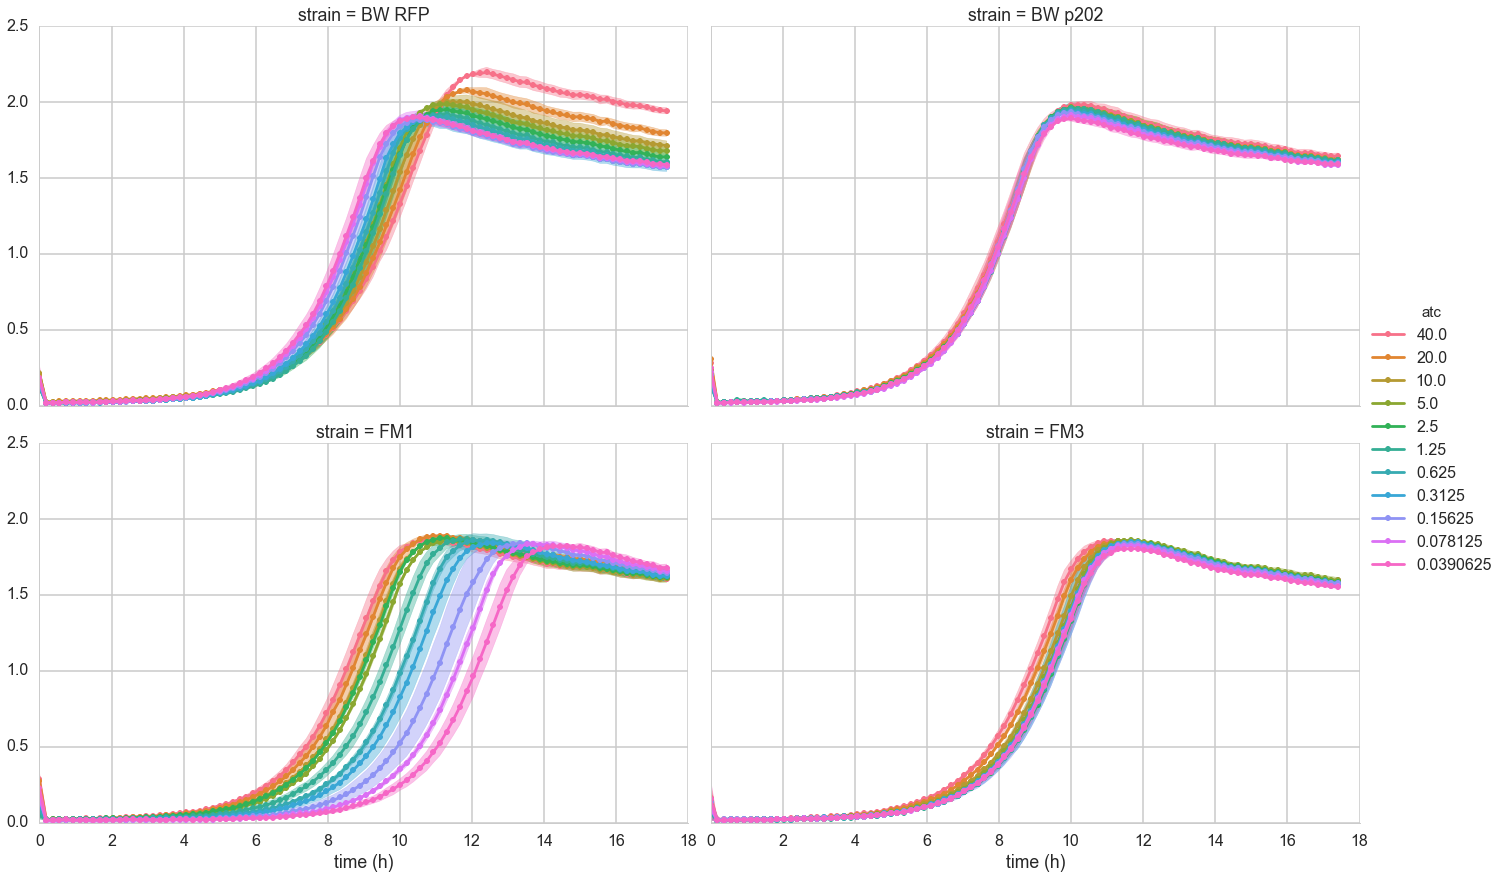

In [9]:
d=J.well_info.query('atc<80')
with sns.plotting_context('poster'):
    with sns.axes_style('whitegrid'):
        J.group_plot(J.abs600,col='strain',hue='atc',col_wrap=2,size=6,aspect=1.6,shade_reps=True,data=d)


>we can plot RFP just as easily
>
>again, we'll exclude the 80nM curve

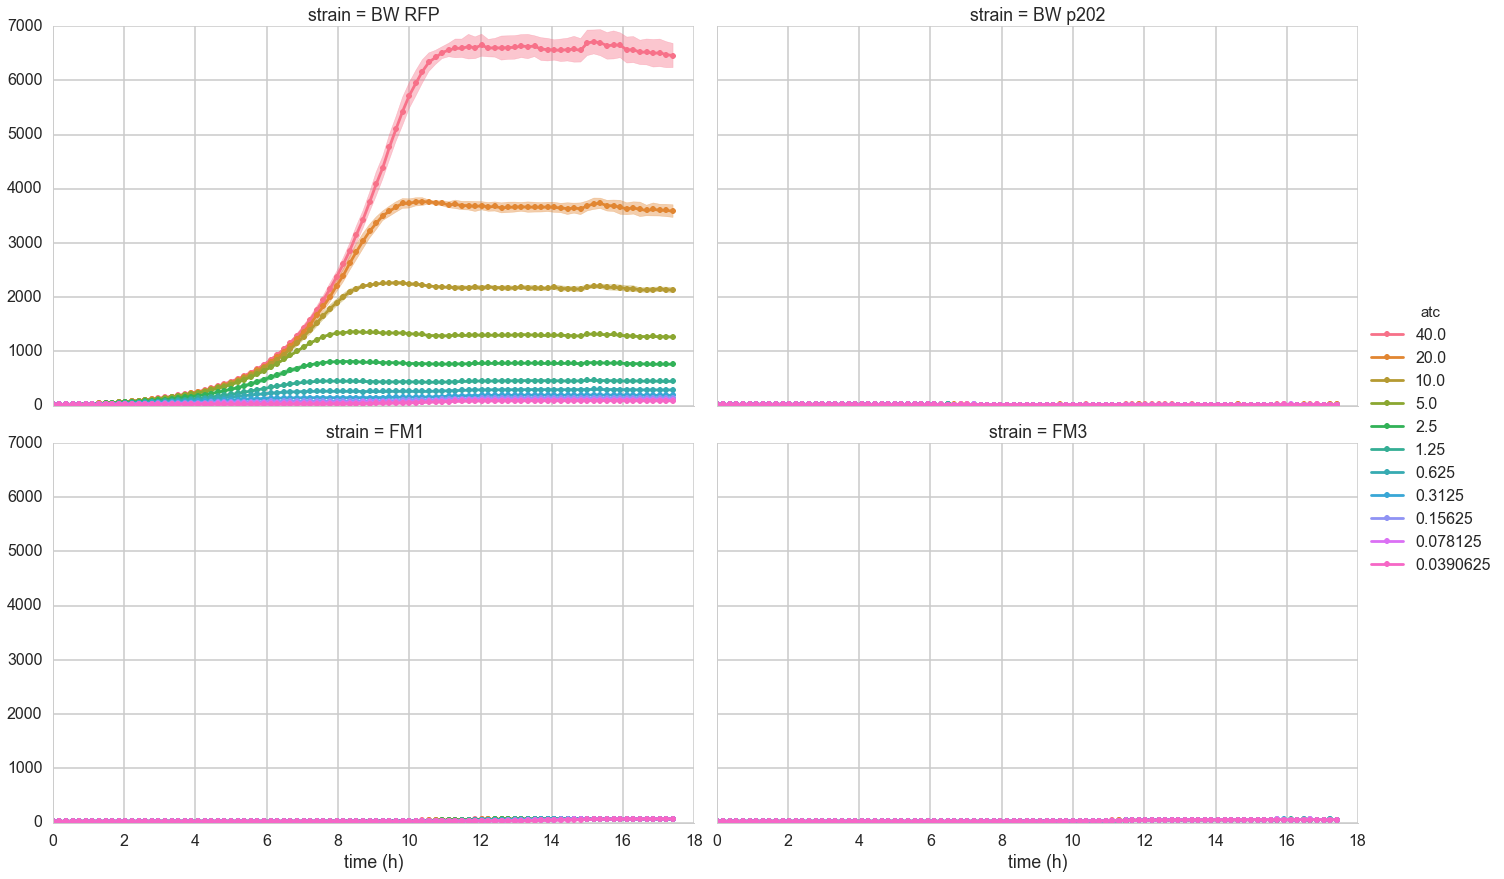

In [10]:
with sns.plotting_context('poster'):
    with sns.axes_style('whitegrid'):
        J.group_plot(J.rfp,col='strain',hue='atc',col_wrap=2,size=6,aspect=1.6,shade_reps=True,data=J.well_info.query('atc<80'))


>raw RFP isn't a great metric, since it's going to be largely dependent on cell density
>
>we can calculate a concentration (RFP/OD) as a simple first pass. It's also important to subtract background, which we're not doing here

In [11]:
#if you just do J.rfp/J.abs600, pandas will only do it on the points where the times match perfectly
#so trick it first by just matching the time column
J.rfp_conc=J.rfp
J.rfp_conc.index=J.abs600.index
J.rfp_conc=J.rfp_conc/J.abs600


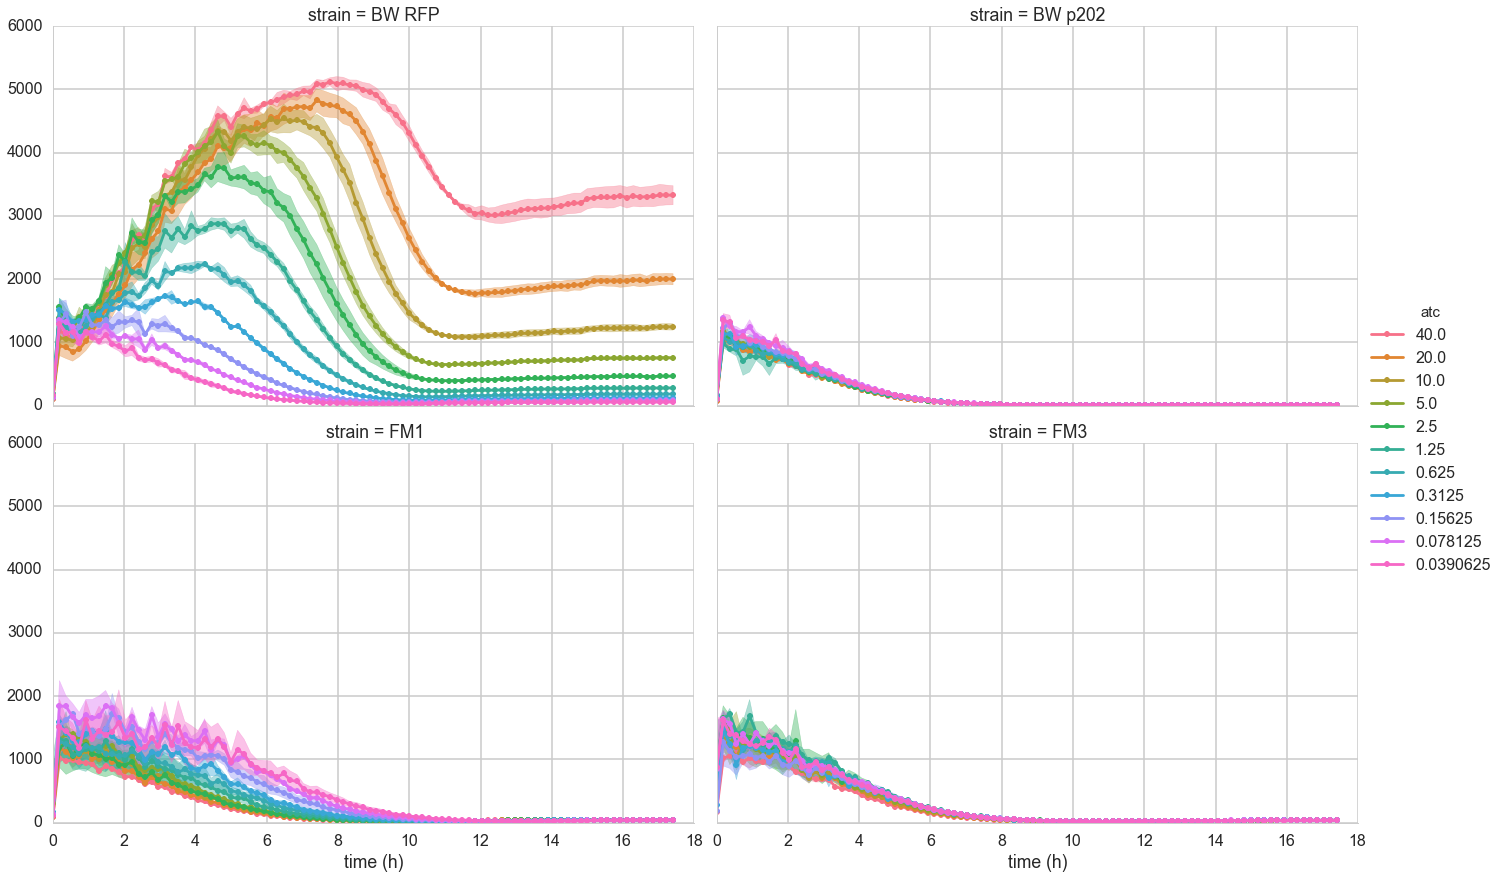

In [12]:

with sns.plotting_context('poster'):
    with sns.axes_style('whitegrid'):
        J.group_plot(J.rfp_conc,col='strain',hue='atc',col_wrap=2,size=6,aspect=1.6,shade_reps=True,data=J.well_info.query('atc<80'))


>If there is interest, I will add code to calculate promoter activity or other fluorescence-based metrics
>
>Or you can do it and contribute the code!